In [ ]:
# importing pandas to read the csv file
import pandas as pd
# importing matplotlib for plotting graphs
import matplotlib.pyplot as plt

In [ ]:
# reading the csv file with harry potter and percy jackson data from Ao3
data=pd.read_csv("/content/combined_fandom_info_final.csv")

In [ ]:
# printing first 5 columns of the data
data.head()

,title,author,word_count,language,chapters,kudos,comments,hits,published,last_updated,status,bookmarks,collections,relationships,warnings,age_category,fandoms,characters,freeform_tags
0,Healing Magic,Amoureuxlove12,28854,English,11,105,38,2421,2024-10-04,2024-10-11,ongoing,44,NaN,Theodore Nott/Harry Potter,Creator Chose Not To Use Archive Warnings,General Audiences,Harry Potter - J. K. Rowling,"Harry Potter Characters, Original Muggle Chara...","Cute Harry Potter, Smart Harry Potter, Implied..."
1,I'm Harry!! The Intern? That's Me.,Mumpumlum,16625,English,16,1393,242,33185,2023-09-08,2024-10-11,ongoing,347,/collections/Hp_random_love,"Harry Potter & Tony Stark, Harry Potter & Stev...",Creator Chose Not To Use Archive Warnings,Not Rated,"Harry Potter - J. K. Rowling, Marvel Cinematic...","Harry Potter, Tony Stark, Thor, Steve Rogers, ...","Crack Treated Seriously, Fluff and Crack, Fluf..."
2,Severus prevails,Mumka,678,English,1,0,0,0,2024-10-11,2024-10-11,ongoing,0,NaN,Harry Potter & Severus Snape,No Archive Warnings Apply,General Audiences,Harry Potter - J. K. Rowling,"Severus Snape, Harry Potter, James Potter, Lil...",Godric's Hollow (Harry Potter)
3,Harry Potter and the Ritual of Love's Memory,DBow,419542,English,94,694,1097,71175,2022-10-06,2024-10-11,ongoing,221,NaN,Harry Potter/Ginny Weasley,Major Character Death,Teen And Up Audiences,Harry Potter - J. K. Rowling,"Harry Potter, Ginny Weasley, Hermione Granger,...","Time Travel, Alternate Universe - Canon Diverg..."
4,La Semilla,AniramSly,22103,Español,25,3,0,71,2024-10-09,2024-10-11,ongoing,0,NaN,"Hermione Granger/Draco Malfoy, Parvati Patil/B...","Graphic Depictions Of Violence, Major Characte...",Mature,Harry Potter - J. K. Rowling,"Hermione Granger, Draco Malfoy, Theodore Nott,...",NaN


In [ ]:
# number of rows and columns in the data
data.shape

(160, 19)

In [ ]:
# seeing all the columns of the data
data.columns

Index(['title', 'author', 'word_count', 'language', 'chapters', 'kudos',
       'comments', 'hits', 'published', 'last_updated', 'status', 'bookmarks',
       'collections', 'relationships', 'warnings', 'age_category', 'fandoms',
       'characters', 'freeform_tags'],
      dtype='object')

We have 19 columns in the data

**Title** : title of the fanfiction story

**author** : name of the author

**word_count** : word count in the story

**language** : language medium of the story

**chapters** : number of chapters in the story

**kudos** : appreciation for the work

**comments** : number of comments on the work

**hits** : number of times a particular work (story) has been viewed or visited by users on the platform

**published** : published date of the story

**last_updated** : lastest update on the story

**status** : story/ chapters status

**bookmarks** : number of people who bookmarked the story

**collections** : refers to curated groups of works (stories) that are often organized by users around a particular theme, event, or interest.

**relationships** : refers to the romantic or platonic pairings (or groupings) of characters within a story

**warnings** : reading warnings for readers

**age_category** : viewer/ readers category

**Fandoms**: The universe or show the fanfiction is about, like Harry Potter or Marvel.

**Characters**: The people or figures in the story, either from the original work or new ones made by the writer.

**Freeform Tags**: Extra labels that describe what happens in the story, like "Romance," "Adventure," or "Time Travel."

In [ ]:
# data cleaning
# checking for null values in the data
data.isnull().sum()

,0
title,0
author,0
word_count,0
language,0
chapters,0
kudos,0
comments,0
hits,0
published,0
last_updated,0


Here I calculated the empty cells in each column, as we can see that  collections have more number of nulls we have 37 nulls out of 40 datapoints so I will drop the column

In [ ]:
# dropping the collections column
data.drop('collections', axis=1, inplace=True)

In [ ]:
data.shape

(160, 18)

In the result we can see that we have 18 columns after dropping collections column

In [ ]:
data.isnull().sum()

,0
title,0
author,0
word_count,0
language,0
chapters,0
kudos,0
comments,0
hits,0
published,0
last_updated,0


In [ ]:
# unique author valuaes
len(data['author'].unique())

149

We have 39 different authors

### 1. How lengthy are the works? (Distribution of Word Counts)

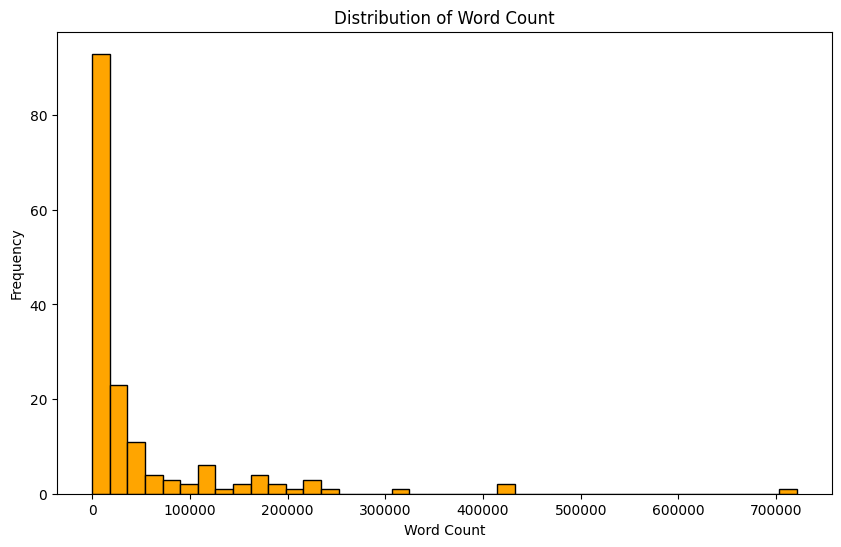

In [ ]:
# x values as word count
x = data['word_count']

# simple histogram with a reasonable number of bins
plt.figure(figsize=(10, 6))  # for the image size
plt.hist(x, bins=40, color='orange', edgecolor='black')  # adjusted bin value to 40 and used orange as hist color and black to differentiate bins

# adding labels
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Count')

# Showing the plot
plt.show()


The histogram illustrates that the majority of fanfictions in this dataset are relatively short, with a large concentration of works having low word counts. Most stories appear to be under 50,000 words, indicating that shorter works are more common. As the word count increases, the number of works decreases significantly, showing a sharp drop in frequency. There are only a few fanfictions with higher word counts, with some works surpassing 100,000 words and only a rare few reaching around 400,000 words. This distribution suggests that while some authors write longer stories, the vast majority of fanfictions tend to be much shorter in length. The skewed nature of the distribution emphasizes that short-form fanfiction dominates the dataset.


## 2. Do longer works get more hits and kudos?(Correlation Between Hits, Kudos, Comments, and Word Count)

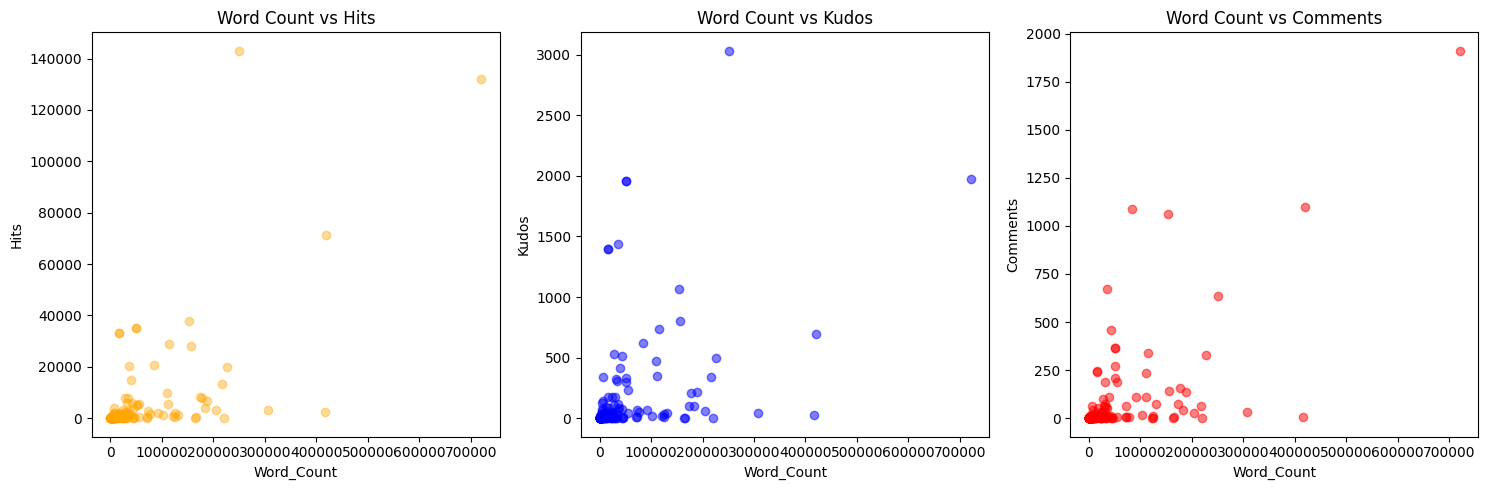

In [ ]:
# for multiple subplots
plt.figure(figsize=(15, 5))

# Word Count vs Hits
plt.subplot(1, 3, 1)

# data label x as word count
# alpha for transparency
plt.scatter(data['word_count'], data['hits'], color='orange', alpha=0.4)

# graph labels
plt.xlabel('Word_Count')
plt.ylabel('Hits')
plt.title('Word Count vs Hits')

# Scatter plot Word Count vs Kudos
plt.subplot(1, 3, 2)

# data label x as word count
# alpha for transparency
plt.scatter(data['word_count'], data['kudos'], color='blue', alpha=0.5)
plt.xlabel('Word_Count')
plt.ylabel('Kudos')
plt.title('Word Count vs Kudos')

# Scatter plot for Word Count vs Comments
plt.subplot(1, 3, 3)


# data label x as word count
# alpha for transparency
plt.scatter(data['word_count'], data['comments'], color='red', alpha=0.5)

# graph labels
plt.xlabel('Word_Count')
plt.ylabel('Comments')
plt.title('Word Count vs Comments')

# Display the plots
plt.tight_layout()
plt.show()



## 3. When are people publishing the most?(Trend of Publication Over Time)

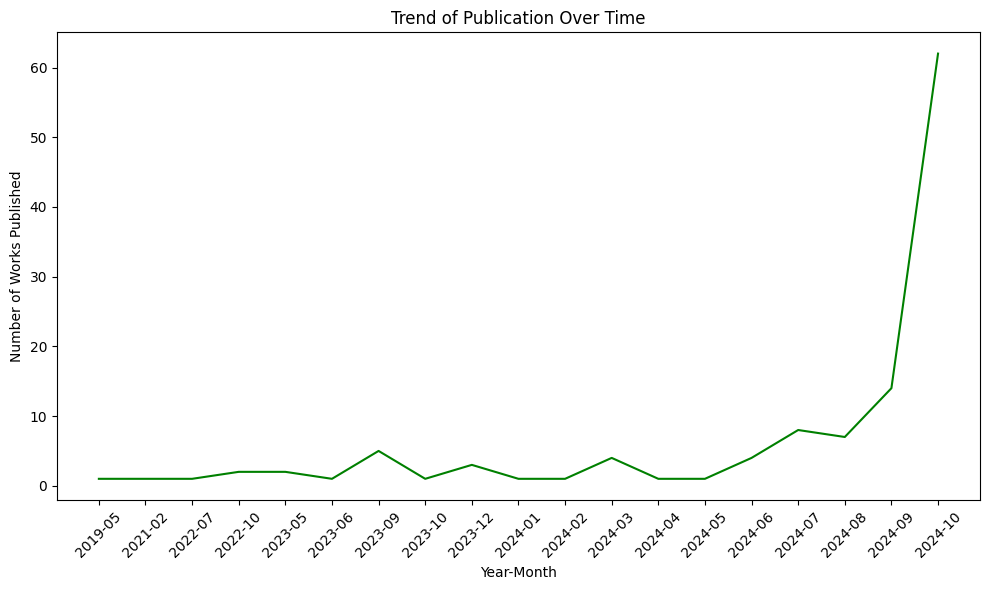

In [ ]:


# Ensuring if the 'published' column is in datetime format
data['published'] = pd.to_datetime(data['published'], errors='coerce')

# Creating a new column for the year and month of publication
data['year_month'] = data['published'].dt.to_period('M')


# count of publications made each month
monthly_publications = data.groupby('year_month').size()

# trend of publication over time
# fig size
plt.figure(figsize=(10, 6))
plt.plot(monthly_publications.index.astype(str), monthly_publications, color='green')

# labels and title
plt.xlabel('Year-Month')
plt.ylabel('Number of Works Published')
plt.title('Trend of Publication Over Time')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# plot display with spaceious view
plt.tight_layout()
plt.show()


We can see a up trend of publications over time

## 4. Are ongoing or completed works more popular?(Status of Works and Their Popularity)



In [ ]:
data['status'].value_counts()

,count
status,
ongoing,160


From the data points collected we can see that all the data points belong to ongoing category

## 5. Which fandoms are the most popular? (Top Fandoms by Hits, Kudos, and Comments)

In [ ]:
# 'fandoms' group and calculating the sum of hits, kudos, and comments
fandom_popularity = data.groupby('fandoms')[['hits', 'kudos', 'comments']].sum()

# Sorting the fandoms by hits, kudos, and comments for finding the top ones
top_fandoms = fandom_popularity.sort_values(by=['hits', 'kudos', 'comments'], ascending=False)

#top fandoms
print(top_fandoms.head(10))  # Show the top 10 fandoms


                                                      hits  kudos  comments
fandoms                                                                    
Naruto (Anime & Manga)                              148005   2877      2493
Twilight Series - Stephenie Meyer, Twilight Ser...  144825   3091       641
Harry Potter - J. K. Rowling                         82318   1194      1254
Spider-Man - All Media Types, Spider-Man (Tom H...   70360   3918       732
Harry Potter - J. K. Rowling, Marvel Cinematic ...   66506   2788       487
Pocket Monsters | Pokemon - All Media Types          38063    855       425
Harry Potter - J. K. Rowling, Percy Jackson and...   37992   1066      1064
Batman - All Media Types, Young Justice (Cartoo...   28217    806       140
Batman - All Media Types                             20800    626      1087
Marvel Cinematic Universe, Spider-Man - All Med...   20251   1440       671


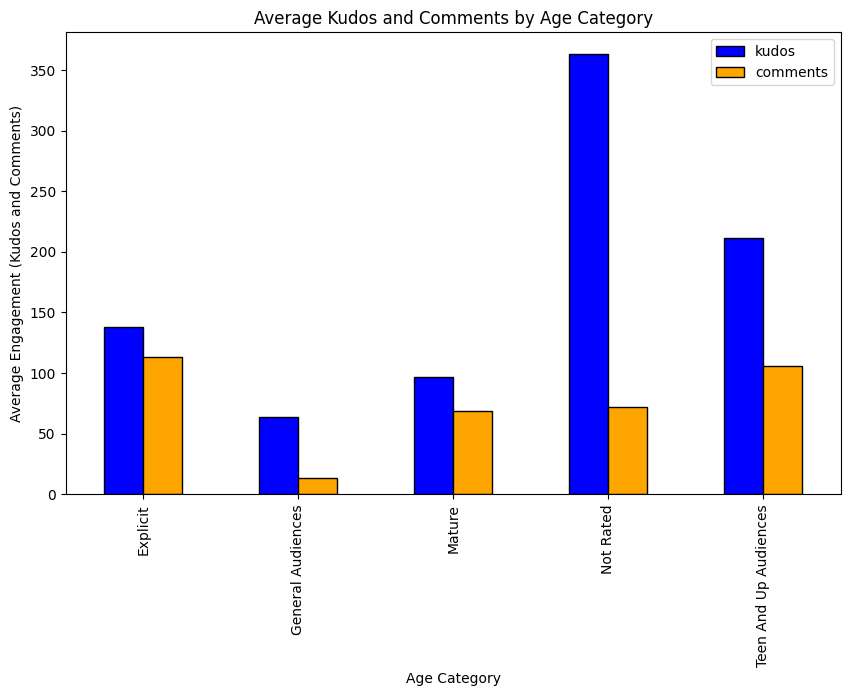

In [ ]:
# 'age_category' and the average kudos and comments
age_rating_engagement = data.groupby('age_category')[['kudos', 'comments']].mean()

# bar chart for kudos and comments
age_rating_engagement.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'], edgecolor='black')

# titles and labels
plt.title('Average Kudos and Comments by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Average Engagement (Kudos and Comments)')



# Show the plot


plt.show()


In the fandoms we collected the top two are Naruto (Anime & Manga)and Twilight Series - Stephenie Meyer, Twilight Series




## 6. Who are the most popular character pairings? (Character/Relationship Popularity)



In [ ]:

#relationships and sum of hits, kudos, and comments
relationship_popularity = data.groupby('relationships')[['hits', 'kudos', 'comments']].sum()

# Sorting the relationships by hits, kudos, and comments for finding the top pairings
top_relationships = relationship_popularity.sort_values(by=['hits', 'kudos', 'comments'], ascending=False)

#  top 10 most popular character pairings
print(top_relationships.head(10))  # the top 10 relationships


                                                      hits  kudos  comments
relationships                                                              
Aro (Twilight)/Original Female Character(s), Ar...  143081   3032       636
Hatake Kakashi/Uzumaki Naruto, Hatake Kakashi &...  132039   1975      1911
Harry Potter/Ginny Weasley                           71175    694      1097
Dick Grayson & Peter Parker, Peter Parker & Dam...   70360   3918       732
Harry Potter & Tony Stark, Harry Potter & Steve...   66506   2788       487
Hermione Granger & Harry Potter & Ron Weasley, ...   37992   1066      1064
Dick Grayson & Bruce Wayne, Dick Grayson & Jaso...   28217    806       140
Dick Grayson/Reader                                  20759    618      1087
Tony Stark/Stephen Strange, Peter Parker & Tony...   20251   1440       671
Din Djarin/Bo-Katan Kryze, Din Djarin & Grogu |...   19912    497       327


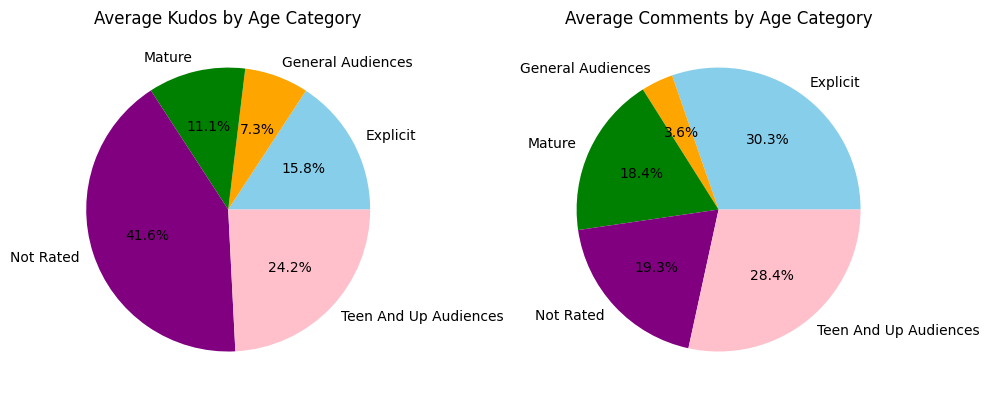

In [ ]:
import matplotlib.pyplot as plt

# age_category and calculate the average kudos and comments
age_rating_engagement = data.groupby('age_category')[['kudos', 'comments']].mean()

#  figure with two pie charts
plt.figure(figsize=(10, 5))

# Pie chart for Kudos
plt.subplot(1, 2, 1)
# pie charts with percent of each category
plt.pie(age_rating_engagement['kudos'], labels=age_rating_engagement.index, autopct='%1.1f%%', colors=['skyblue', 'orange', 'green', 'purple','pink'])
plt.title('Average Kudos by Age Category')

# pie chart for Comments
plt.subplot(1, 2, 2)
# pie charts with percent of each category
plt.pie(age_rating_engagement['comments'], labels=age_rating_engagement.index, autopct='%1.1f%%', colors=['skyblue', 'orange', 'green', 'purple','pink'])
plt.title('Average Comments by Age Category')

# the plot
# for spacious view
plt.tight_layout()
plt.show()


These are the top 3 character pairing                                                      hits  kudos  comments
relationships                                                                          
Aro (Twilight)/Original Female Character(s),143081   3032       636
Hatake Kakashi/Uzumaki Naruto, Hatake Kakashi  132039   1975      1911
Harry Potter/Ginny Weasley                    71175    694      1097
Dick Grayson & Peter Parker, Peter Parker     70360   3918       732

we have 3 popular pairs from Twilight series, naruto and Harrypotter fanfiction stories



## 7. Do different age ratings affect engagement?(Distribution of Kudos and Comments by Age Category)



In [ ]:
# age_category and calculate the average kudos and comments
age_rating_engagement = data.groupby('age_category')[['kudos', 'comments']].mean()

#  average kudos and comments for each age category
print(age_rating_engagement)


                            kudos    comments
age_category                                 
Explicit               137.578947  113.105263
General Audiences       63.696970   13.606061
Mature                  96.692308   68.487179
Not Rated              363.117647   71.941176
Teen And Up Audiences  211.000000  106.019231


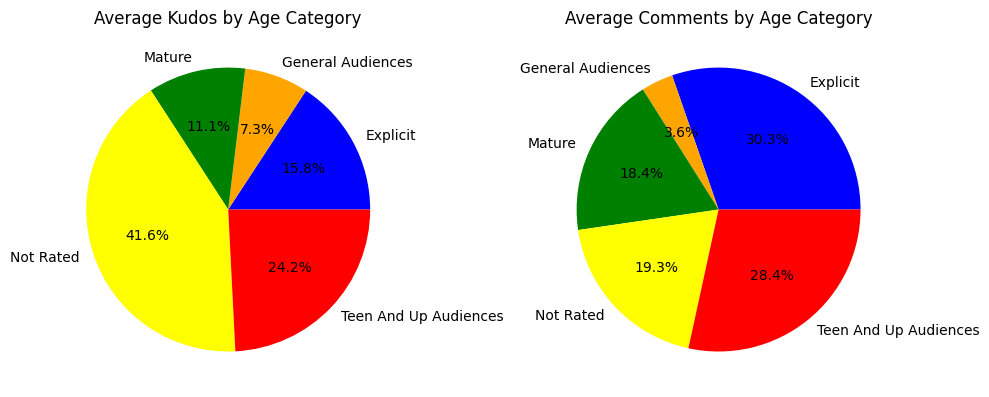

In [ ]:
import matplotlib.pyplot as plt

# 'age_category' and calculate the average kudos and comments
age_rating_engagement = data.groupby('age_category')[['kudos', 'comments']].mean()

# a figure with two pie charts
plt.figure(figsize=(10, 5))

# Pie chart for Kudos
plt.subplot(1, 2, 1)
plt.pie(age_rating_engagement['kudos'], labels=age_rating_engagement.index, autopct='%1.1f%%', colors=['blue', 'orange', 'green', 'yellow','red'])
plt.title('Average Kudos by Age Category')

# Pie chart for Comments
plt.subplot(1, 2, 2)
plt.pie(age_rating_engagement['comments'], labels=age_rating_engagement.index, autopct='%1.1f%%', colors=['blue', 'orange', 'green', 'yellow','red'])
plt.title('Average Comments by Age Category')

# the plot
# for spacious view
plt.tight_layout()
plt.show()



Works rated as **Not Rated** and **Teen and Up Audiences** receive the most engagement, with **Not Rated** taking the largest share of kudos at 41.6%, while **Teen and Up Audiences** leads in comments, capturing 28.4%. Other categories, like **General Audiences**, **Explicit**, and **Mature**, see much less engagement by comparison.



## 8. Which authors are the most successful?(Top Authors by Average Hits, Kudos, and Comments)



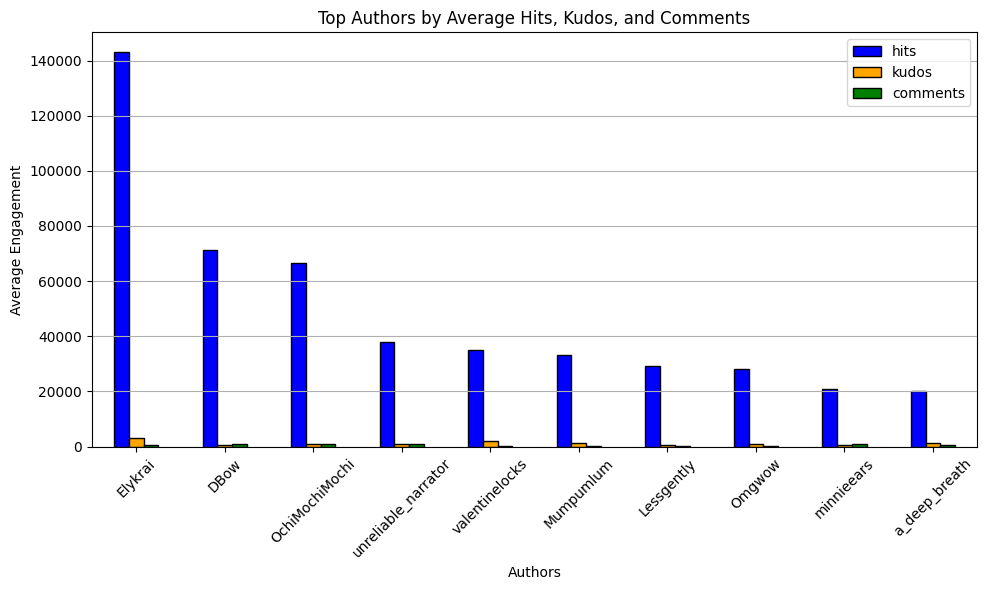

In [ ]:
import matplotlib.pyplot as plt

# Group by author for calculating the average hits, kudos, and comments
author_success = data.groupby('author')[['hits', 'kudos', 'comments']].mean()

# Sorting authors by hits, kudos, and comments for the top 10 authors
top_authors = author_success.sort_values(by=['hits', 'kudos', 'comments'], ascending=False).head(10)

# Plotting the top authors with average hits, kudos, and comments
top_authors.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange', 'green'], edgecolor='black')

# Adding labels and title
plt.title('Top Authors by Average Hits, Kudos, and Comments')
plt.xlabel('Authors')
plt.ylabel('Average Engagement')
plt.xticks(rotation=45)
plt.grid(axis='y')


# the plot
# for spacious view
plt.tight_layout()
plt.show()



The bar chart highlights **Elykrai** as the most successful author, significantly outpacing others in average hits. **DBow** and **OchiMochiMochi** follow, but at lower levels. While kudos and comments are part of the engagement, the standout metric for the top authors appears to be the number of hits.



## 9. Do more chapters mean more hits?(Relationship Between Chapters and Hits/Kudos)



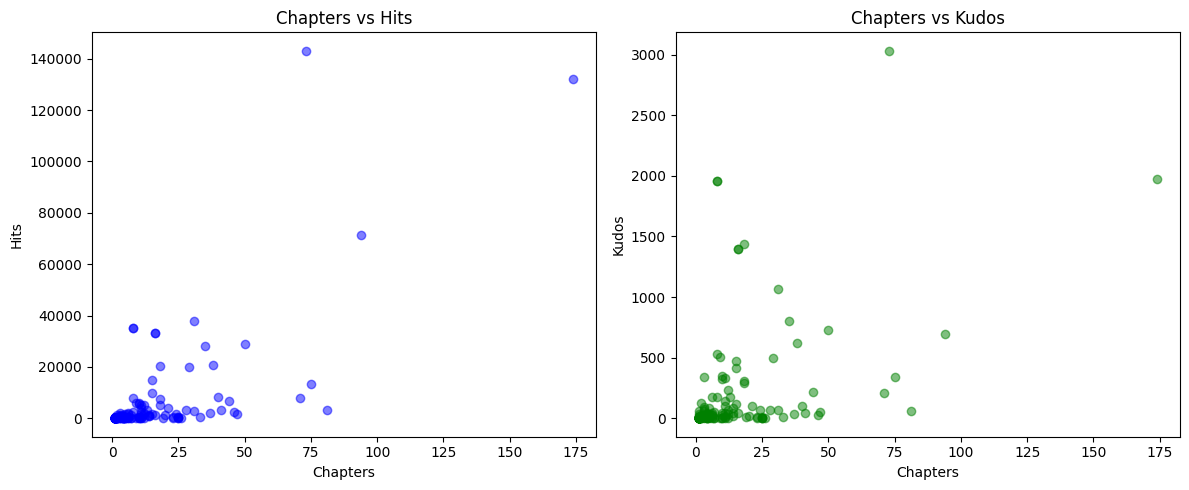

In [ ]:
# Scatter plot for Chapters vs Hits and Kudos
plt.figure(figsize=(12, 5))

# Chapters vs Hits
plt.subplot(1, 2, 1)
plt.scatter(data['chapters'], data['hits'], color='blue', alpha=0.5)
plt.xlabel('Chapters')
plt.ylabel('Hits')
plt.title('Chapters vs Hits')

# Chapters vs Kudos
plt.subplot(1, 2, 2)
plt.scatter(data['chapters'], data['kudos'], color='green', alpha=0.5)
plt.xlabel('Chapters')
plt.ylabel('Kudos')
plt.title('Chapters vs Kudos')

#  the plot
plt.tight_layout()
plt.show()



The scatter plots indicate a positive trend between the number of chapters and both hits and kudos. While works with more chapters generally receive higher engagement, there are several shorter works that still manage to gather a considerable number of hits and kudos.



## 10. Which languages are the most popular for works? (Works by Language and Their Popularity)

<ipython-input-29-a2dae7a29182>:18: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  plt.tight_layout()
<ipython-input-29-a2dae7a29182>:18: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  plt.tight_layout()
<ipython-input-29-a2dae7a29182>:18: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from current font.
  plt.tight_layout()
<ipython-input-29-a2dae7a29182>:18: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from current font.
  plt.tight_layout()
<ipython-input-29-a2dae7a29182>:18: UserWarning: Glyph 35805 (\N{CJK UNIFIED IDEOGRAPH-8BDD}) missing from current font.
  plt.tight_layout()
<ipython-input-29-a2dae7a29182>:18: UserWarning: Glyph 22283 (\N{CJK UNIFIED IDEOGRAPH-570B}) missing from current font.
  plt.tight_layout()
<ipython-input-29-a2dae7a29182>:18: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  plt.tight_layout()
/usr/l

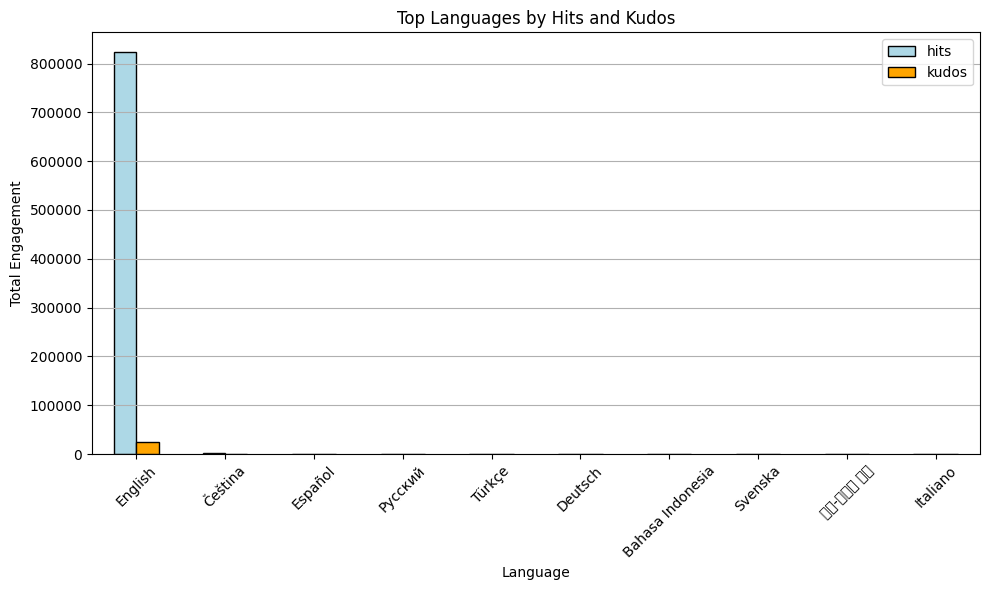

In [ ]:
# Group by language and sum the hits and kudos
language_popularity = data.groupby('language')[['hits', 'kudos']].sum()

# Sort by hits and kudos to see the most popular languages
top_languages = language_popularity.sort_values(by=['hits', 'kudos'], ascending=False).head(10)

# Plotting the top languages by hits and kudos
top_languages.plot(kind='bar', figsize=(10, 6), color=['lightblue', 'orange'], edgecolor='black')

# Adding labels and title
plt.title('Top Languages by Hits and Kudos')
plt.xlabel('Language')
plt.ylabel('Total Engagement')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()



English dominates as the most popular language for fanfiction by a vast margin, both in terms of hits and kudos. Other languages, such as **Čeština**, **Español**, and **Pyccknn**, are represented but have much lower engagement, showing that English fanfictions are overwhelmingly favored in the dataset.